# Funções auxiliares

Execute essas células primeiro.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
try:
    import sim
except:
    print ('--------------------------------------------------------------')
    print ('"sim.py" could not be imported. This means very probably that')
    print ('either "sim.py" or the remoteApi library could not be found.')
    print ('Make sure both are in the same folder as this file,')
    print ('or appropriately adjust the file "sim.py"')
    print ('--------------------------------------------------------------')
    print ('')

import time

In [18]:
#Ângulos de Euler

def Rx(theta):
 
    return np.array([[  1, 0            , 0           ],
                      [ 0, np.cos(theta), np.sin(theta)],
                      [ 0, -np.sin(theta), np.cos(theta)]])
  
def Ry(theta):
 
    return np.array([[  np.cos(theta), 0, -np.sin(theta)],
                      [ 0            , 1, 0           ],
                      [ np.sin(theta), 0, np.cos(theta)]])

def Rz(theta):
    
    return np.array([[  np.cos(theta), np.sin(theta),  0],
                      [ -np.sin(theta), np.cos(theta),  0],
                      [ 0,             0,              1]])

# Apenas para visualização de um referencial no plano
def plot_frame(Porg, R, c=['r', 'g']):
    
    axis_size = 2.0
    axes = axis_size*R
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
        
    # X
    plt.quiver(*Porg[:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)

#Calcula a inversa de uma matriz de transformação. Mais eficiente que o cálculo tradicional de matriz inversa!
def invert_transform(R, Porg):
    R_t = R.T
    p_org = -R_t @ Porg
    
    aux = np.array([0, 0, 0, 1])
    T = np.column_stack((R_t, p_org))
    T = np.row_stack((T, aux))
    return T

# Parte 1: Transformações homogêneas

Para rodar essa parte, abra a cena "cena.ttt" no CoppeliaSim, clique em Play e execute a célula a seguir.
Ela irá calcular as matrizes de transformação homogênea e plotar as transformações de todos os elementos em relação ao frame do robô.

Program started
Connected to remote API server
treeposr [[ 0.49928354  0.86643317 -0.00308209]
 [-0.86643718  0.49928609  0.00006808]
 [ 0.00159783  0.00263644  0.99999525]]
treeorir [-0.3501293659210205, -1.4125375747680664, -0.13765443861484528]
Twr=
 [[ 0.49931285  0.86642032  0.00158215 -1.67222534]
 [-0.86642053  0.49930823  0.00259745 -0.15768681]
 [ 0.0014605  -0.00266775  0.99999538 -0.13558341]
 [ 0.          0.          0.          1.        ]]
Ttr=
 [[ 0.49931285  0.86642032  0.00158215 -1.04702159]
 [-0.86642053  0.49930823  0.00259745  1.01052953]
 [ 0.0014605  -0.00266775  0.99999538 -0.13960698]
 [ 0.          0.          0.          1.        ]]
Tpr=
 [[ 0.86642024 -0.499313    0.00158215 -0.09842036]
 [ 0.49930838  0.86642045  0.00259745 -1.38565512]
 [-0.00266775 -0.0014605   0.99999538  0.03011706]
 [ 0.          0.          0.          1.        ]]
Tsr=
 [[ 0.00158243  0.49931286  0.86642032 -3.87125103]
 [ 0.00259849 -0.86642053  0.49930823  0.45115481]
 [ 0.999995

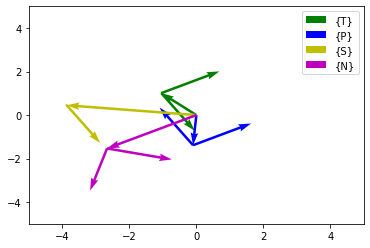

In [30]:

####################################################################################
#                                                                                  #
#                 LEMBRE-SE QUE A SIMULAÇÃO DEVE ESTAR EM EXECUÇÃO!                #
#                                                                                  #
####################################################################################

np.set_printoptions(suppress=True)

print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')
    
    #declara os Handles de cada elemento
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, 'Pioneer_p3dx', sim.simx_opmode_oneshot_wait)
    returnCode, treeHandle = sim.simxGetObjectHandle(clientID, 'tree', sim.simx_opmode_oneshot_wait)
    returnCode, plantHandle = sim.simxGetObjectHandle(clientID, 'indoorPlant', sim.simx_opmode_oneshot_wait)
    returnCode, sofaHandle = sim.simxGetObjectHandle(clientID, 'sofa', sim.simx_opmode_oneshot_wait)
    returnCode, naoHandle = sim.simxGetObjectHandle(clientID, 'NAO', sim.simx_opmode_oneshot_wait)
    
    #obtém posição e orientação de cada elemento em relação ao robô
    
    returnCode, robot_pos = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, robot_ori = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    
    returnCode, tree_pos = sim.simxGetObjectPosition(clientID, treeHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, tree_ori = sim.simxGetObjectOrientation(clientID, treeHandle, -1, sim.simx_opmode_oneshot_wait)
    
    returnCode, tree_pos_r = sim.simxGetObjectPosition(clientID, treeHandle, robotHandle, sim.simx_opmode_oneshot_wait)
    returnCode, tree_ori_r = sim.simxGetObjectOrientation(clientID, treeHandle, robotHandle, sim.simx_opmode_oneshot_wait)
    
    print('treeposr',Rx(tree_ori_r[0]) @ Ry(tree_ori_r[1]) @  Rz(tree_ori_r[2]))
    print('treeorir',tree_pos_r)
    
    returnCode, plant_pos = sim.simxGetObjectPosition(clientID, plantHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, plant_ori = sim.simxGetObjectOrientation(clientID, plantHandle, -1, sim.simx_opmode_oneshot_wait)
    
    returnCode, sofa_pos = sim.simxGetObjectPosition(clientID, sofaHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, sofa_ori = sim.simxGetObjectOrientation(clientID, sofaHandle, -1, sim.simx_opmode_oneshot_wait)
    
    returnCode, nao_pos = sim.simxGetObjectPosition(clientID, naoHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, nao_ori = sim.simxGetObjectOrientation(clientID, naoHandle, -1, sim.simx_opmode_oneshot_wait)

    aux = np.array([0, 0, 0, 1])
    
    #calculo da matriz de rotação a partir dos ângulos de Euler; 
    #o padrão do Coppelia para rotações com ângulos de Euler é Rx.Ry.Rz (https://www.coppeliarobotics.com/helpFiles/en/eulerAngles.htm)
    Rrw = Rx(robot_ori[0]) @ Ry(robot_ori[1]) @  Rz(robot_ori[2]) #R -> W
    Trw = np.column_stack((Rrw, robot_pos))
    Trw = np.row_stack((Trw,aux))
    
    #Transformação inversa W -> R

    Twr = invert_transform(Rrw, robot_pos)
    print('Twr=\n',Twr)
        
    Rtw = Rx(tree_ori[0]) @ Ry(tree_ori[1]) @  Rz(tree_ori[2]) #T -> W
    Ttw = np.column_stack((Rtw, tree_pos))
    Ttw = np.row_stack((Ttw, aux))
    #calcula a transformação do frame do arvore -> robo
    Ttr = Twr @ Ttw
    print('Ttr=\n',Ttr)
    
    Rpw = Rx(plant_ori[0]) @ Ry(plant_ori[1]) @ Rz(plant_ori[2]) #P -> W
    Tpw = np.column_stack((Rpw, plant_pos))
    Tpw = np.row_stack((Tpw, aux))
    #calcula a transformação do frame planta -> robo
    Tpr = Twr @ Tpw
    print('Tpr=\n',Tpr)
    
    Rsw = Rx(sofa_ori[0]) @ Ry(sofa_ori[1]) @ Rz(sofa_ori[2]) #S -> W
    Tsw = np.column_stack((Rsw, sofa_pos))
    Tsw = np.row_stack((Tsw, aux))
    #calcula a transformação do frame sofa -> robo
    Tsr = Twr @ Tsw
    print('Tsr=\n',Tsr)
    
    Rnw = Rx(nao_ori[0]) @ Ry(nao_ori[1]) @ Rz(nao_ori[2]) #N -> W
    Tnw = np.column_stack((Rnw, nao_pos))
    Tnw = np.row_stack((Tnw, aux))
    #calcula a transformação do frame NAO -> robo
    Tnr = Twr @ Tnw
    print('Tnr=\n',Tnr)
    
    #plota os frames de referência
    org = np.array([0,0])
    pt_rorg = np.array(Ttr[:,3])
    plot_frame(pt_rorg, Ttr[:3,:3], ['g','g'])
    plt.quiver(*org, *pt_rorg[:2], color='g', angles='xy', scale_units='xy', scale=1, label='{T}')
    
    pp_rorg = np.array(Tpr[:,3])
    plot_frame(pp_rorg, Tpr[:3,:3], ['b', 'b'])
    plt.quiver(*org, *pp_rorg[:2], color='b', angles='xy', scale_units='xy', scale=1, label='{P}')
    
    ps_rorg = np.array(Tsr[:,3])
    plot_frame(ps_rorg, Tsr[:3,:3], ['y', 'y'])
    plt.quiver(*org, *ps_rorg[:2], color='y', angles='xy', scale_units='xy', scale=1, label='{S}')
    
    pn_rorg = np.array(Tnr[:,3])
    plot_frame(pn_rorg, Tnr[:3,:3], ['m','m'])
    plt.quiver(*org, *pn_rorg[:2], color='m', angles='xy', scale_units='xy', scale=1, label='{N}')
    
    x1,x2,y1,y2 = plt.axis()  
    plt.axis((-5,5,-5,5))
    plt.legend()
    
    # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive. You can guarantee this with (for example):
    sim.simxGetPingTime(clientID)

    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

## Relações entre os elementos
Ainda com a "cena.ttt" aberta, clique em Play e execute a célula abaixo.
Ela irá calcular as matrizes de transformação homogênea de cada elemento estático em relação aos demais da cena (com exceção do robô), e plotar essas transformações em um gráfico .

Program started
Program ended


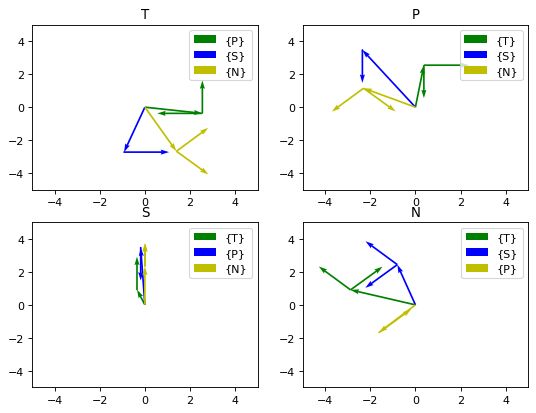

In [31]:
print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    
    returnCode, robot_pos = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, robot_ori = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    
    returnCode, tree_pos = sim.simxGetObjectPosition(clientID, treeHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, tree_ori = sim.simxGetObjectOrientation(clientID, treeHandle, -1, sim.simx_opmode_oneshot_wait)
    
    returnCode, plant_pos = sim.simxGetObjectPosition(clientID, plantHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, plant_ori = sim.simxGetObjectOrientation(clientID, plantHandle, -1, sim.simx_opmode_oneshot_wait)
    
    returnCode, sofa_pos = sim.simxGetObjectPosition(clientID, sofaHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, sofa_ori = sim.simxGetObjectOrientation(clientID, sofaHandle, -1, sim.simx_opmode_oneshot_wait)
    
    returnCode, nao_pos = sim.simxGetObjectPosition(clientID, naoHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, nao_ori = sim.simxGetObjectOrientation(clientID, naoHandle, -1, sim.simx_opmode_oneshot_wait)
    
    #calculo da matriz de rotação a partir dos ângulos de Euler; 
    #o padrão do Coppelia para rotações com ângulos de Euler é Rx.Ry.Rz (https://www.coppeliarobotics.com/helpFiles/en/eulerAngles.htm)
    
    Rtw = Rx(tree_ori[0]) @ Ry(tree_ori[1]) @  Rz(tree_ori[2]) #T -> W
    Ttw = np.column_stack((Rtw, tree_pos))
    Ttw = np.row_stack((Ttw, aux))
    Twt = invert_transform(Rtw, tree_pos) #inversa W -> T
    
    Rpw = Rx(plant_ori[0]) @ Ry(plant_ori[1]) @ Rz(plant_ori[2]) #P -> W
    Tpw = np.column_stack((Rpw, plant_pos))
    Tpw = np.row_stack((Tpw, aux))
    Twp = invert_transform(Rpw, plant_pos) # inversa W -> P
    
    Rsw = Rx(sofa_ori[0]) @ Ry(sofa_ori[1]) @ Rz(sofa_ori[2]) #S -> W
    Tsw = np.column_stack((Rsw, sofa_pos))
    Tsw = np.row_stack((Tsw, aux))
    Tws = invert_transform(Rsw, sofa_pos) # inversa W -> S
    
    Rnw = Rx(nao_ori[0]) @ Ry(nao_ori[1]) @ Rz(nao_ori[2]) #N -> W
    Tnw = np.column_stack((Rnw, nao_pos))
    Tnw = np.row_stack((Tnw, aux))
    Twn = invert_transform(Rnw, nao_pos) # inversa W -> N
    
    #Cálculo das relações entre os diferentes elementos
    #Árvore (T)
    Tpt = Twt @ Tpw
    Tst = Twt @ Tsw
    Tnt = Twt @ Tnw
    
    #Planta (P)
    Ttp = Twp @ Ttw
    Tsp = Twp @ Tsw
    Tnp = Twp @ Tnw
    
    #Sofá (S)
    Tts = Tws @ Ttw
    Tps = Tws @ Tpw
    Tns = Tws @ Tnw
    
    #NAO (N)
    Ttn = Twn @ Ttw
    Tpn = Twn @ Tpw
    Tsn = Twn @ Tsw
        
    plt.figure(figsize=(8, 6), dpi=80)
    
    #plota os frames de referência em relação ao frame T
    plt.subplot(2,2,1)
    org = np.array([0,0])
    pp_torg = np.array(Tpt[:,3])
    plot_frame(pp_torg, Tpt[:3,:3], ['g','g'])
    plt.quiver(*org, *pp_torg[:2], color='g', angles='xy', scale_units='xy', scale=1, label='{P}')
    
    ps_torg = np.array(Tst[:,3])
    plot_frame(ps_torg, Tst[:3,:3], ['b', 'b'])
    plt.quiver(*org, *ps_torg[:2], color='b', angles='xy', scale_units='xy', scale=1, label='{S}')
    
    pn_torg = np.array(Tnt[:,3])
    plot_frame(pn_torg, Tnt[:3,:3], ['y', 'y'])
    plt.quiver(*org, *pn_torg[:2], color='y', angles='xy', scale_units='xy', scale=1, label='{N}')
    
    x1,x2,y1,y2 = plt.axis()  
    plt.axis((-5,5,-5,5))
    plt.legend()
    plt.title('T')
    
    #plota os frames de referência em relação ao frame P
    plt.subplot(2,2,2)
    pt_porg = np.array(Ttp[:,3])
    plot_frame(pt_porg, Ttp[:3,:3], ['g','g'])
    plt.quiver(*org, *pt_porg[:2], color='g', angles='xy', scale_units='xy', scale=1, label='{T}')
    
    ps_porg = np.array(Tsp[:,3])
    plot_frame(ps_porg, Tsp[:3,:3], ['b', 'b'])
    plt.quiver(*org, *ps_porg[:2], color='b', angles='xy', scale_units='xy', scale=1, label='{S}')
    
    pn_porg = np.array(Tnp[:,3])
    plot_frame(pn_porg, Tnp[:3,:3], ['y', 'y'])
    plt.quiver(*org, *pn_porg[:2], color='y', angles='xy', scale_units='xy', scale=1, label='{N}')
    
    x1,x2,y1,y2 = plt.axis()  
    plt.axis((-5,5,-5,5))
    plt.legend()
    plt.title('P')
    
    #plota os frames de referência em relação ao frame S
    plt.subplot(2,2,3)
    pt_sorg = np.array(Tts[:,3])
    plot_frame(pt_sorg, Tts[:3,:3], ['g','g'])
    plt.quiver(*org, *pt_sorg[:2], color='g', angles='xy', scale_units='xy', scale=1, label='{T}')
    
    pp_sorg = np.array(Tps[:,3])
    plot_frame(pp_sorg, Tps[:3,:3], ['b', 'b'])
    plt.quiver(*org, *pp_sorg[:2], color='b', angles='xy', scale_units='xy', scale=1, label='{P}')
    
    pn_sorg = np.array(Tns[:,3])
    plot_frame(pn_sorg, Tns[:3,:3], ['y', 'y'])
    plt.quiver(*org, *pn_sorg[:2], color='y', angles='xy', scale_units='xy', scale=1, label='{N}')
    
    x1,x2,y1,y2 = plt.axis()  
    plt.axis((-5,5,-5,5))
    plt.legend()
    plt.title('S')
    
    #plota os frames de referência em relação ao frame N
    plt.subplot(2,2,4)
    pt_norg = np.array(Ttn[:,3])
    plot_frame(pt_norg, Ttn[:3,:3], ['g','g'])
    plt.quiver(*org, *pt_norg[:2], color='g', angles='xy', scale_units='xy', scale=1, label='{T}')
    
    pp_norg = np.array(Tpn[:,3])
    plot_frame(pp_norg, Tpn[:3,:3], ['b', 'b'])
    plt.quiver(*org, *pp_norg[:2], color='b', angles='xy', scale_units='xy', scale=1, label='{S}')
    
    ps_norg = np.array(Tsn[:,3])
    plot_frame(ps_norg, Tsn[:3,:3], ['y', 'y'])
    plt.quiver(*org, *ps_norg[:2], color='y', angles='xy', scale_units='xy', scale=1, label='{P}')
    
    x1,x2,y1,y2 = plt.axis()  
    plt.axis((-5,5,-5,5))
    plt.legend()
    plt.title('N')
    
    # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive. You can guarantee this with (for example):
    sim.simxGetPingTime(clientID)
    
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

# Parte 2: Laser
Para executar essa parte, abra a cena "cena_laser.ttt" e execute a célula abaixo.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

import math

# Retorna um vetor com duas colunas: [angulo, dist]
def format_laser_data(range_data, scan_range, step_size, max_sensor_range=5):

    laser_data = []

    range_data = np.asarray(range_data)
    pts = math.floor(scan_range/step_size)
    
    # Rotacionando 90 graus
    angle =- scan_range*0.5
    for i in range(pts):
        
        dist = range_data[i]        
        if dist <= 0:
             dist = max_sensor_range
        
        laser_data.append([angle, dist])
            
        angle=angle+step_size
        
    return np.array(laser_data)
    
# Desenha os pontos do laser no referencial global
def draw_laser_data(laser_data, x_robot, y_robot, yaw, fig, max_sensor_range=5):
    
    ax = fig.add_subplot(111, aspect='equal')
        
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        if dist < max_sensor_range:
            x = (dist * np.cos(ang+yaw))+x_robot
            y = (dist * np.sin(ang+yaw))+y_robot
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    #ax.plot(x_robot, y_robot, 'k>', markersize=10)
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])

## Transformações referentes ao laser
Clique no botão "Real time mode" e dê play na simulação antes de executar a célula abaixo.

A célula de código abaixo calcula e imprime a matriz de transformação homogênea do frame do laser em relação ao robô, e do robô em relação ao mundo.

Em seguida, o robô iniciará sua rotina de navegação, desviando de obstáculos detectados pelos feixes do laser. Em seguida, essas transformações são utilizadas para plotar o caminho do robô executado durante a navegação, bem como os pontos do laser referenciados no frame global.

Depois que o robô terminar de navegar, o script pode demorar um pouco pra terminar de plotar o gráfico, mas ele termina!

Program started
Connected to remote API server
Trw:
 [[-0.00009899 -0.99999999 -0.00007341  0.25546944]
 [ 0.99999522 -0.00009876 -0.00309172  1.85059071]
 [ 0.00309171 -0.00007372  0.99999522  0.13864221]
 [ 0.          0.          0.          1.        ]]
Tlr:
 [[ 1.         -0.00000882  0.00001189  0.00074473]
 [ 0.00000882  1.          0.0000023  -0.00001642]
 [-0.00001189 -0.0000023   1.          0.11999957]
 [ 0.          0.          0.          1.        ]]
Tlr_d:
 [[1.         0.         0.         0.00000009]
 [0.         1.         0.         0.00000006]
 [0.         0.         1.         0.12      ]
 [0.         0.         0.         1.        ]]
[[-1.57079633  2.58052778]
 [-1.5646604   2.58067179]
 [-1.55852448  2.58091354]
 ...
 [ 1.55238856  2.09468055]
 [ 1.55852448  2.09456134]
 [ 1.5646604   5.        ]]


<ipython-input-32-0bbe28f5d15f>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, aspect='equal')


Program ended


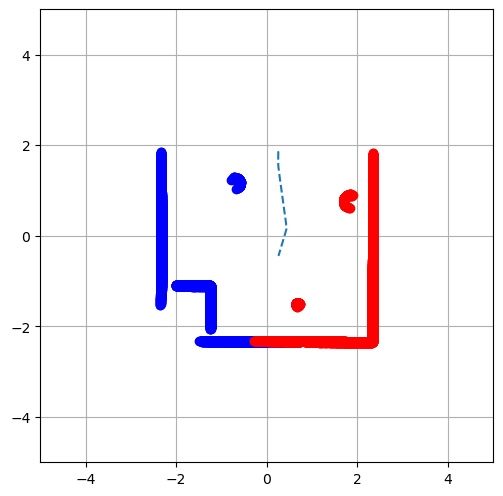

In [33]:
print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')
    
    # Iniciando a simulação
    # Deve usar a porta do 'continuous remote API server services' (remoteApiConnections.txt)
    # e = sim.simxStartSimulation(clientID,sim.simx_opmode_blocking)

    # Handle para o ROBÔ    
    robotname = 'Pioneer_p3dx'
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait)
    returnCode, laserHandle = sim.simxGetObjectHandle(clientID, 'Hokuyo_URG_04LX_UG01_ROS', sim.simx_opmode_oneshot_wait)
    
    # Handle para as juntas das RODAS
    returnCode, l_wheel = sim.simxGetObjectHandle(clientID, robotname + '_leftMotor', sim.simx_opmode_oneshot_wait)
    returnCode, r_wheel = sim.simxGetObjectHandle(clientID, robotname + '_rightMotor', sim.simx_opmode_oneshot_wait)    
    
    #obtém a pose do robô no referencial do mundo
    returnCode, robot_pos = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
    returnCode, robot_ori = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    Rrw = Rx(robot_ori[0]) @ Ry(robot_ori[1]) @  Rz(robot_ori[2]) #R -> W
    Trw = np.column_stack((Rrw, robot_pos))
    Trw = np.row_stack((Trw,aux))
    Twr = invert_transform(Rrw, robot_pos) #inversa W -> R
    
    print('Trw:\n',Trw)
        
    #obtém a pose do laser no referencial do mundo
    returnCode, laser_pos = sim.simxGetObjectPosition(clientID, laserHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, laser_ori = sim.simxGetObjectOrientation(clientID, laserHandle, -1, sim.simx_opmode_oneshot_wait)
    Rlw = Rx(laser_ori[0]) @ Ry(laser_ori[1]) @  Rz(laser_ori[2]) #L -> W
    Tlw = np.column_stack((Rlw, laser_pos))
    Tlw = np.row_stack((Tlw, aux))
    Twl = invert_transform(Rlw, laser_pos) #inversa W -> L
    
    Tlr = np.linalg.inv(Trw) @ Tlw # L -> R
    print('Tlr:\n',Tlr)
    
    #obtendo a posição do laser no frame do robô de maneira direta para validação
    returnCode, laser_pos_d = sim.simxGetObjectPosition(clientID, laserHandle, robotHandle, sim.simx_opmode_oneshot_wait)
    returnCode, laser_ori_d = sim.simxGetObjectOrientation(clientID, laserHandle, robotHandle, sim.simx_opmode_oneshot_wait)
    Rlr_d = Rx(laser_ori_d[0]) @ Ry(laser_ori_d[1]) @  Rz(laser_ori_d[2])
    Tlr_d = np.column_stack((Rlr_d, laser_pos_d))
    Tlr_d = np.row_stack((Tlr_d,aux))
    print('Tlr_d:\n',Tlr_d)
    
    # Handle para os dados do LASER
    laser_data_name = "hokuyo_range_data"
    
    # Geralmente a primeira leitura é inválida (atenção ao Operation Mode)
    # Em loop até garantir que as leituras serão válidas
    returnCode = 1
    while returnCode != 0:
        returnCode, range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_streaming + 10)
    
    # Prosseguindo com as leituras
    returnCode, string_range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_buffer)
    raw_range_data = sim.simxUnpackFloats(string_range_data)
    
    scan_range = 180*np.pi/180
    step_size = 2*np.pi/1024
    laser_data = format_laser_data(raw_range_data, scan_range, step_size)
    
    print(laser_data)
    #draw_laser_data(laser_data)
    
    #raise SystemExit()
    
    # Dados do Pioneer
    L = 0.381   # Metros
    r = 0.0975  # Metros

    t = 0
    # Lembrar de habilitar o 'Real-time mode'
    startTime=time.time()
    lastTime = startTime
    fig = plt.figure(figsize=(6,6), dpi=100)
    robot_x = []
    robot_y = []
    while t < 15:
        
        now = time.time()
        dt = now - lastTime
        
        #obtem a pose do robô no referencial global
        returnCode, robot_pos = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
        returnCode, robot_ori = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    
        # Fazendo leitura do laser       
        returnCode, string_range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_buffer)
        raw_range_data = sim.simxUnpackFloats(string_range_data)
        laser_data = format_laser_data(raw_range_data, scan_range, step_size)
        robot_x.append(robot_pos[0])
        robot_y.append(robot_pos[1])
        draw_laser_data(laser_data, robot_pos[0], robot_pos[1], robot_ori[2], fig)
        
        # Velocidade básica (linear, angular)
        v = 0
        w = np.deg2rad(0)      

        frente = int(len(laser_data)/2)
        lado_direito = int(len(laser_data)*1/4)
        lado_esquerdo = int(len(laser_data)*3/4)
        
        if laser_data[frente, 1] > 2:
            v = .5
            w = 0
        elif laser_data[lado_direito, 1] > 2:
            v = 0
            w = np.deg2rad(-30)
        elif laser_data[lado_esquerdo, 1] > 2:
            v = 0
            w = np.deg2rad(30)
        
        # Isso é o modelo cinemático, estudaremos detalhadamente depois!
        wl = v/r - (w*L)/(2*r)
        wr = v/r + (w*L)/(2*r)
        
        # Enviando velocidades
        sim.simxSetJointTargetVelocity(clientID, l_wheel, wl, sim.simx_opmode_streaming + 5)
        sim.simxSetJointTargetVelocity(clientID, r_wheel, wr, sim.simx_opmode_streaming + 5)        
    
        t = t + dt  
        lastTime = now
    plt.plot(robot_x,robot_y,'--')

    # Parando o robô    
    sim.simxSetJointTargetVelocity(clientID, r_wheel, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, l_wheel, 0, sim.simx_opmode_oneshot_wait)        
       
    # Parando a simulação     
    sim.simxStopSimulation(clientID,sim.simx_opmode_blocking)         
        
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')